# Otoczka wypukła

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer

### Przykładowe zastosowanie narzędzia do wizualizacji

In [2]:
def draw_example_1():
    vis = Visualizer()

    # point = (x, y)
    points = [
        (-62.781083483620016, 9.295526540248986),
        (-10.543100198806997, -26.080520917553812),
        (-81.64932184252287, -74.42163273030921),
        (-36.297317058417946, -72.91194239793609),
        (37.795092197502356, 57.71110085986143),
        (62.511149567563905, -29.172821102708937),
        (21.82806671019955, 2.647377124715007),
        (-46.24539555503924, 42.65521594922478),
        (-77.92302295134137, -7.666110427206263),
        (25.85862324263843, 62.49564419388622),
        (-27.71649622636616, -67.33453457840331),
        (94.83039177581244, -55.52473300629532),
        (-26.29675918891381, -51.30150933048958),
        (-70.11654929355294, 16.723865705806816),
        (26.682887992598097, -65.55763984116587),
        (57.03377667841906, -55.56635171240132),
        (-16.053624841650247, -42.333295668531456),
        (-56.810858686395505, -37.41219002465095),
        (15.604076302407279, -24.85779870929437),
        (-71.77261869976445, -12.306083264402673),
    ]
    # line_segment = ((x1, y1), (x2, y2))
    line_segments = [
        ((-81.64932184252287, -74.42163273030921), (-36.297317058417946, -72.91194239793609)),
        ((-36.297317058417946, -72.91194239793609), (26.682887992598097, -65.55763984116587)),
        ((26.682887992598097, -65.55763984116587), (94.83039177581244, -55.52473300629532)),
        ((94.83039177581244, -55.52473300629532), (37.795092197502356, 57.71110085986143)),
        ((37.795092197502356, 57.71110085986143), (25.85862324263843, 62.49564419388622)),
        ((25.85862324263843, 62.49564419388622), (-46.24539555503924, 42.65521594922478)),
        ((-46.24539555503924, 42.65521594922478), (-70.11654929355294, 16.723865705806816)),
        ((-70.11654929355294, 16.723865705806816), (-77.92302295134137, -7.666110427206263)),
        ((-77.92302295134137, -7.666110427206263), (-81.64932184252287, -74.42163273030921)),
    ]
    vis.add_point(points, color="green")
    vis.add_line_segment(line_segments, color="blue")
    vis.show()

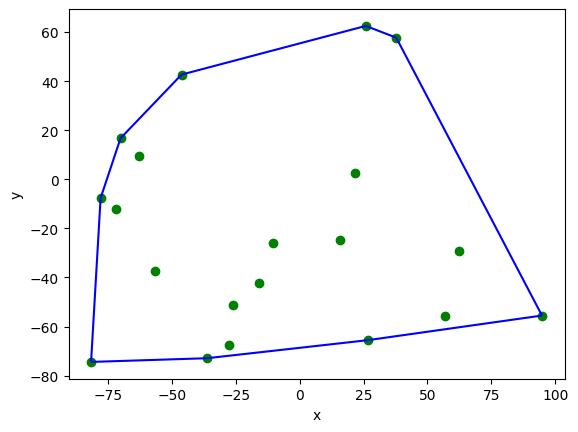

In [3]:
draw_example_1()

### Wprowadzenie

Czym jest otoczka wypukła?  
Podzbiór płaszczyzny $Q$ nazywamy wypukłym iff, gdy dla dowolnej pary punktów $p, q \in Q$ odcinek $\overline{pq}$ jest całkowicie zawarty w $Q$.  
Otoczka wypukła $\mathcal{CH}(Q)$ zbioru $Q$ jest najmniejszym wypukłym zbiorem zawierającym $Q$.

### Zastosowania otoczku wypukłej

Otoczki wypukłe - w szczególności otoczki wypukłe w przestrzeni trójwymiarowej - są spotykane w różnych zastosowaniach. Na przykład używa się ich do przyspieszania wykrywania kolizji w animacji komputerowej. Przepuśćmy, że chcemy sprawdzić, czy dwa obiekty $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się. Jeśli przez większość czasu odpowiedź na to pytanie jest negatywna, to opłaca się następująca strategia. Przybliżamy obiekty przez prostrze obiekty $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$, które zawierały orginały. Jeśli chcemy sprwadzić, czy $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się, najpierw sprawdzamy, czy przecinają się $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$. Jeśli występuje ten przypadek, to powinniśmy wykonać test na orginalnych obiektach, który jest przepuszczalnie znacznie kosztowniejszy.  
Sprawdzanie przecięcia otoczek wypukłych jest bardziej skomplikowane niż dla sfer - choć mimo to łatwiejsze niż dla obiektów niewypukłych - ale otoczki wypukłe mogą dużo lepiej przybliżać większość obiektów.

## Generowanie losowych punktów na płaszczyźnie 

Zapoznaliśmy się i wiemy jak generowac losowe punkty na płaszczyźnie z laboratorium I (współrzędne rzeczywiste typu *double* - podwójna precyzja obliczeń). Przygotuj zestawy punktów, które będzie można użyć jako testowe dla algorytmów obliczania otoczki wypukłej.

Uzupełnij funkcję ```generate_uniform_points```.

In [4]:
def generate_uniform_points(left=-100, right=100, n=100):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym
    obszarze od left do right (jednakowo na osi y)
    o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
             np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    arr = [(random.uniform(left, right), random.uniform(left, right)) for _ in range(n)]
    return arr

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x \in \langle -100,100 \rangle$ oraz $y \in \langle -100,100\rangle$.

In [5]:
points_a = generate_uniform_points(-100, 100, 100)

Zwizualizuj wygenerowane punkty.

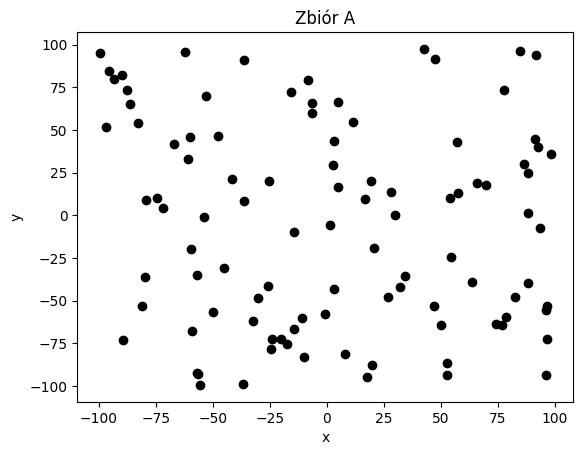

In [6]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a, color='black')
vis.add_title('Zbiór A')
#vis.axis_equal()
vis.show()

Uzupełnij funkcję ```generate_circle_points```.

In [7]:
def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    arr = []
    for i in range(n):
        theta = np.random.random_sample()
        arr.append((np.cos(2*np.pi*theta)*R, np.sin(2*np.pi*theta)*R))
    return arr

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $O = (0,0)$ i promieniu $R = 10$.

In [8]:
points_b = generate_circle_points((0, 0), 10, 100)

Zwizualizuj wygenerowane punkty.

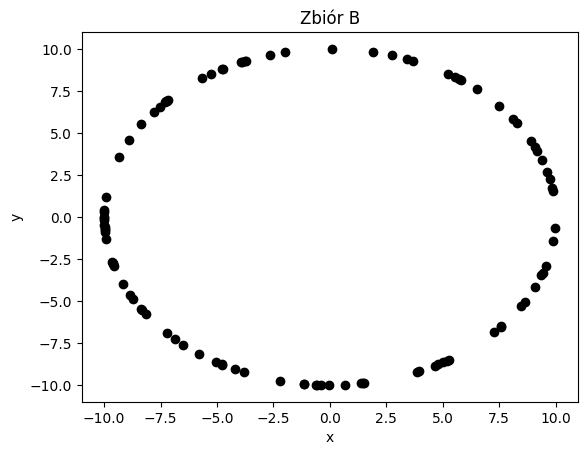

In [9]:
# visualize(points_b)
vis.clear()
vis.add_point(points_b, color='black')
vis.add_title('Zbiór B')
vis.show()

Jak można było zauważyć, to funkcje ```generate_uniform_points``` oraz ```generate_circle_points``` są takie same jak w laboratorium I.

Uzupełnij funkcję ```generate_rectangle_points```.

In [10]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    '''
    Funkcja generuje n punktów na obwodzie prostokąta
    o wierzchołkach w punktach a, b, c i d
    :param a: lewy-dolny wierzchołek prostokąta
    :param b: prawy-dolny wierzchołek prostokąta
    :param c: prawy-górny wierzchołek prostokąta
    :param d: lewy-górny wierzchołek prostokąta
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    arr = []
    for i in range(n):
        side = random.randint(0,3)
        if side==0:
            x = random.uniform(a[0], b[0])
            y = a[1]
        elif side==1:
            x = b[0]
            y = random.uniform(b[1], c[1])
        elif side==2:
            x = random.uniform(d[0], c[0])
            y = c[1]
        elif side==3:
            x = a[1]
            y = random.uniform(a[1], d[1])
        arr.append((x,y))
    return arr
    raise Exception("Unimplemented")


<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na obwodzie prostokąta, którego wyznaczają wierzchołki
$(-10,-10), (10,-10), (10,10)$ oraz $(-10,10)$.

In [11]:
points_c = generate_rectangle_points(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

Zwizualizuj wygenerowane punkty.

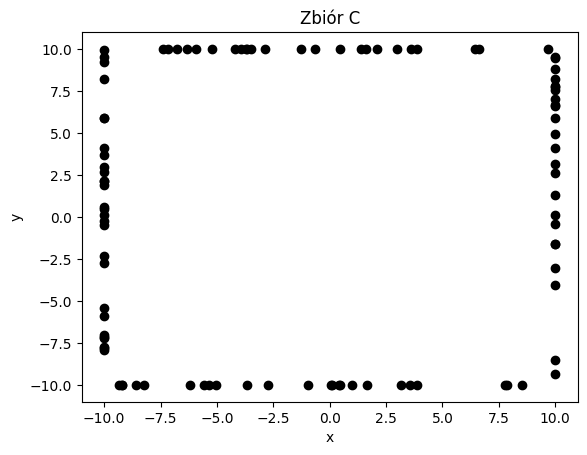

In [12]:
# visualize(points_c)
vis.clear()
vis.add_point(points_c, color='black')
vis.add_title('Zbiór C')
vis.show()

Uzupełnij funkcję ```generate_square_points```.

In [13]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=25, diag_n=20):
    '''
    Funkcja generuje axis_n punktów na dwóch bokach kwadratu
    leżących na osiach x i y oraz diag_n punktów na
    przektąnych kwadratu, którego wyznaczają punkty
    a, b, c i d.
    :param a: lewy-dolny wierzchołek kwadratu
    :param b: prawy-dolny wierzchołek kwadratu
    :param c: prawy-górny wierzchołek kwadratu
    :param d: lewy-górny wierzchołek kwadratu
    :param axis_n: ilość generowanych punktów na każdym
                   z dwóch boków kwadratu równoległych do osi x i y
    :param diag_n: ilość generowanych punktów na każdej
                   przekątnej kwadratu
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    arr = [a, b, c, d]
    for i in range(axis_n):
        x = random.uniform(a[0], b[0])
        y = a[1]
        arr.append((x, y))
    for i in range(axis_n):
        x = a[0]
        y = random.uniform(a[1], d[1])
        arr.append((x, y))
    for i in range(diag_n):
        x = random.uniform(a[0], c[0])
        y = x
        arr.append((x, y))
    for i in range(diag_n):
        x = random.uniform(d[0], b[0])
        y = d[1]-x
        arr.append((x, y))
    return arr
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj losowe punktów w przestrzeni 2D w następujący sposób: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu, zawierający punkty wyznaczające kwadrat $(0, 0), (10, 0), (10, 10)$ oraz $(0, 10)$.

In [14]:
points_d = generate_square_points(
    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

Zwizualizuj wygenerowane punkty.

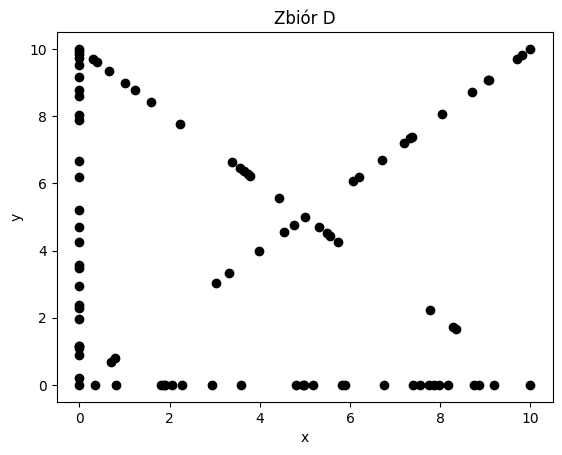

In [15]:
# visualize(points_d)
vis.clear()
vis.add_point(points_d, color='black')
vis.add_title('Zbiór D')
vis.show()

## Algorytm Grahama oraz algorytm Jarvisa

Po przygotowaniu przykładowych zbiorów danych i ich zwizualizowaniu, chcemy zobaczyć jak buduje się dla nich otoczka wypukła z wykorzystaniem różnych algortymów.  
W tych dwóch algorytmach potrzebna będzie funkcja którą już dobrze znamy, czyli funkcja, która sprawdza po której stornie prostej znajduje się punkt.  
Dla każdego algorytmu trzeba będzie zaimplementować dwie funkcje obliczające otoczkę wypukłę, ze względu, że jedna z nich będzie miała możliwość wyświetlania kroków postępowania w algorytmie. Druga funkcja będzie uzyteczna do porównywania czasów dla różnych zbiorów danych i względęm algorytmów.  
W graficznej funkcji danego algorytmu, jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualne rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki, wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).  

### Funkcje pomocnicze

In [16]:
def distance(a, b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**(0.5)

def det(a, b, c):
    return ((a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0]))

def orientation(a, b, c, eps=0):
    orient = det(a, b, c)
    if orient>eps: return 1
    if orient<-eps: return -1
    return 0

def partition(arr,point,left,right):
    i = left-1
    pivot = arr[right]
    for j in range (left, right):
        if orientation(point, arr[j], pivot) == 1 or (orientation(point, arr[j], pivot) == 0 and distance(point, arr[j]) > distance(point, pivot)):
            i+=1
            arr[i],arr[j] = arr[j],arr[i]
    arr[i+1], arr[right] = arr[right], arr[i+1]
    return i+1

def quick_sort(arr,point,left,right):
    if len(arr) == 1:
        return arr
    if left < right:
        pivot = partition(arr,point,left,right)
        quick_sort(arr,point,left,pivot-1)
        quick_sort(arr,point,pivot+1,right)

### Algorytm Grahama

Algorytm Grahama tworzy otoczkę wypukłą poprzez utrzymywanie stosu $S$, w którym znajdują się punkty, które mogą, ale nie muszą tworzyć otoczki wypukłej. Za każdym razem jest wstawiany na stos (push) jeden punkt z zbioru punktów $Q$ i jest on usuwany ze stosu (pop), jeżeli nie jest punktem $\mathcal{CH}(Q)$. Kiedy algorytm kończy się, stos $S$ zawiera tylko punkty otoczki wypukłej $\mathcal{CH}(Q)$ w kierunku przeciwnym do ruchu wskazówek zegera.

---

Procedura $\mathtt{Graham-Build(Q)}$ przyjmuje zbiór punktów $Q$, gdzie $|Q| \geq 3$. Wywołuje ona funkcję $\mathtt{TOP(S)}$, która zwraca punkt z góry stosu bez zmieniania $S$ oraz
$\mathtt{NEXT-TO-TOP(S)}$, która zwraca punkt ponieżej góry stosu $S$, bez zmieniania stosu. Funkcja $\mathtt{PUSH(p, S)}$ wstawia punkt $p$ na stos $S$. Funkcja $\mathtt{POP(p, S)}$ usuwa punkt $p$ ze stosu $S$.

$\mathtt{Graham-Build(Q)}$  
1)  niech $p_0$ będzie punktem w zbiorze Q z najmniejszą współrzędną $y$,  
    oraz najmniejszą współrzędną $x$ w przypadku, gdy wiele punktów ma tą samą współrzędną $x$  
    
2)  nich $\mathtt{\langle p_1, p_2, \dots, p_m \rangle}$ będzie pozostałym zbiorem punktów w $Q$ posortowanym  
    zgodnie z przeciwnym ruchem wskazówek zegara wokół punktu $p_0$  
    (jeżeli więcej niż jeden punkt ma ten sam kąt to usuwamy wszystkie punkty  
     z wyjątkiem tego najbardziej oddalonego od $p_0$)  
3) stwórz pusty stos $S$  
4) $\mathtt{PUSH(p_0, S)}$
5) $\mathtt{PUSH(p_1, S)}$
6) $\mathtt{PUSH(p_2, S)}$
7) **for** $i = 3$ **to** m  
8) &emsp;**while** kąt utworzony przez $\mathtt{NEXT-TO-TOP(S)}$, $\mathtt{TOP(S)}$ oraz $p_i$ tworzy lewostronny skręt
9) &emsp;&emsp;$\mathtt{POP(S)}$
10) &emsp;$\mathtt{PUSH(p_i, S)}$
11) **return** $S$


---

Lewostronny skręt oznacza, że dla trzech kolejnych punktów $a, b, c$, punkt $b$ leży po lewej stronie prostej $ac$.  
  

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama.

In [17]:
def graham_algorithm(Q, filename=None):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    min_point = min(Q, key = lambda x: (x[1], x[0]))
    Q.remove(min_point)
    quick_sort(Q, min_point, 0, len(Q)-1)
    Q.insert(0, min_point)
    to_remove = []
    for i in range(1, len(Q)-1):
        if orientation(min_point, Q[i], Q[i+1]) == 0:
            to_remove.append(i+1)
            i += 1
    Q = [ele for idx, ele in enumerate(Q) if idx not in to_remove]
    if len(Q)<3: return Q
    
    stack = []
    stack.append(Q[0])
    stack.append(Q[1])
    stack.append(Q[2])
    
    m = len(Q)
    
    for i in range(3, m):
        while orientation(stack[-2], stack[-1], Q[i])!=1 and len(stack)>2:
            stack.pop()
        stack.append(Q[i])
    if filename:
        with open(filename, 'w') as file:
            for i in range(len(stack)-1):
                line = ' '.join(str(x) for x in stack[i])
                file.write(line + '\n')
            line = ' '.join(str(x) for x in stack[-1])    
            file.write(line)
    return stack

Przetestuj swoją implementacje algorytmu Grahama, by sprawdzić czy poprawnie obliczana jest otoczka.

In [18]:
Test().runtest(1, graham_algorithm)

Lab 2, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 4.266s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama z dodatkową opcją wyświetlania kroków algorytmu.

In [19]:
def graham_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama oraz
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''
    vis = Visualizer()
    vis.clear()
    vis.add_point(Q, color='black')
    
    min_point = min(Q, key = lambda x: (x[1], x[0]))
    
    Q.remove(min_point)
    quick_sort(Q, min_point, 0, len(Q)-1)
    Q.insert(0, min_point)
    to_remove = []
    for i in range(1, len(Q)-1):
        if orientation(min_point, Q[i], Q[i+1]) == 0:
            to_remove.append(i+1)
            i += 1
    Q = [ele for idx, ele in enumerate(Q) if idx not in to_remove]
    
    if len(Q)<3: return Q
    
    stack = []
    stack.append(Q[0])
    stack.append(Q[1])
    stack.append(Q[2])
    lines = []
    
    for i in range(1, 3):
        lines.append(vis.add_line_segment((Q[i-1], Q[i]), color="red"))
        
    m = len(Q)
    for i in range(3, m):
        while orientation(stack[-2], stack[-1], Q[i])!=1 and len(stack)>2:
            vis.remove_figure(lines[-1])
            stack.pop()
            lines.pop()
        lines.append(vis.add_line_segment((stack[-1], Q[i]), color="red"))
        stack.append(Q[i])
    lines.append(vis.add_line_segment((stack[-1], stack[0]), color="red"))
    return stack, vis

Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [20]:
graham_points_a, vis_graham_a = graham_algorithm_draw(points_a)

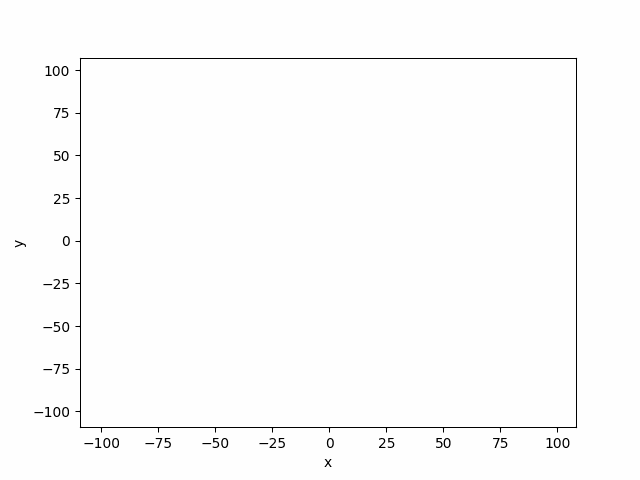

In [21]:
vis_graham_a.show_gif(interval=200)

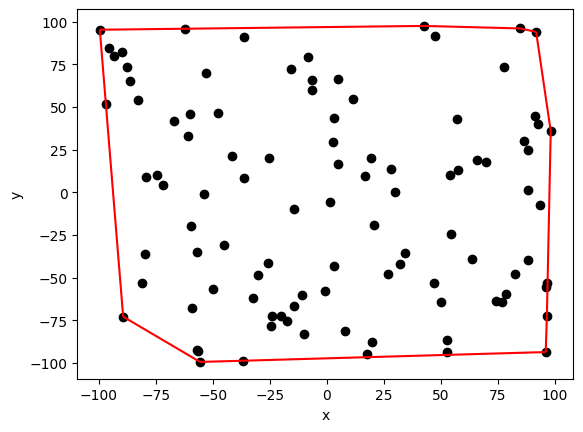

In [22]:
# visualize(graham_points_a)
vis.clear()
vis.add_point(points_a, color='black')
vis.add_line_segment([(graham_points_a[i], graham_points_a[i+1]) for i in range(len(graham_points_a)-1)], color='red')
vis.add_line_segment([graham_points_a[-1], graham_points_a[0]], color="red")
vis.show()

Zbiór danych B

In [23]:
graham_points_b, vis_graham_b = graham_algorithm_draw(points_b)

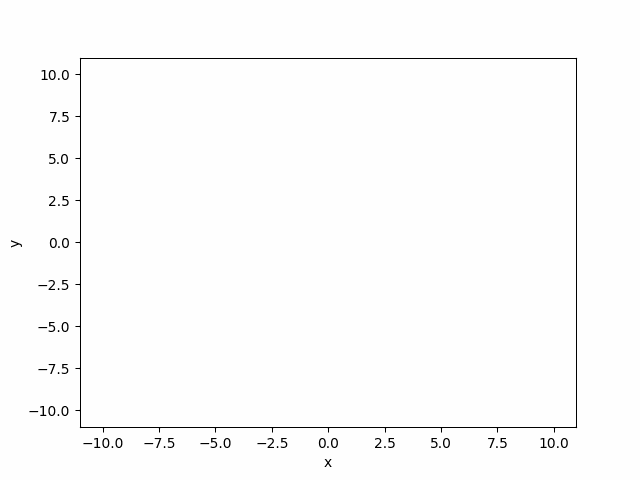

In [24]:
vis_graham_b.show_gif()

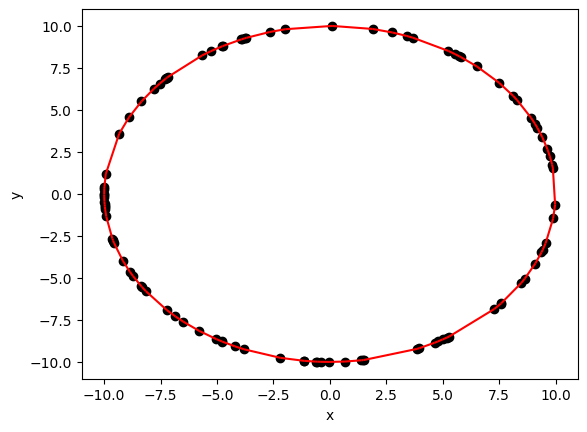

In [25]:
# visualize(graham_points_b)
vis.clear()
vis.add_point(points_b, color='black')
vis.add_line_segment([(graham_points_b[i], graham_points_b[i+1]) for i in range(len(graham_points_b)-1)], color="red")
vis.add_line_segment([graham_points_b[-1], graham_points_b[0]], color="red")
vis.show()

Zbiór danych C

In [26]:
graham_points_c, vis_graham_c = graham_algorithm_draw(points_c)

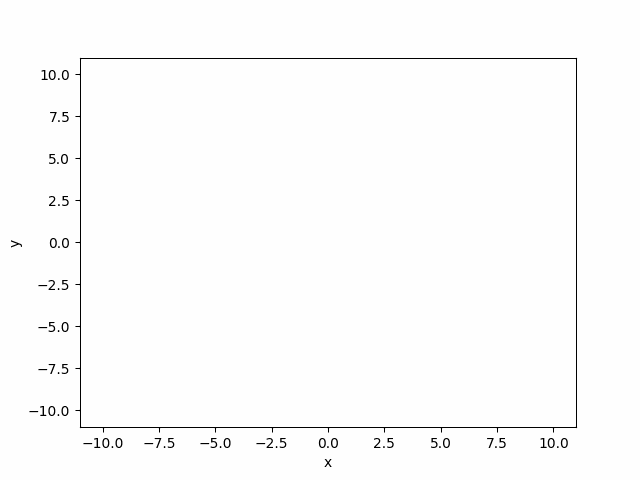

In [27]:
vis_graham_c.show_gif()

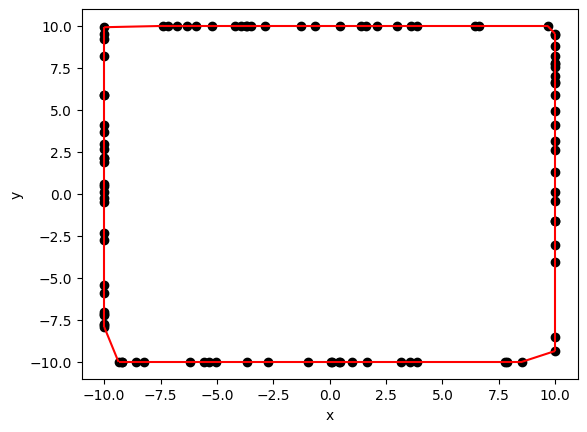

In [28]:
# visualize(graham_points_c)
vis.clear()
vis.add_point(points_c, color='black')
vis.add_line_segment([(graham_points_c[i], graham_points_c[i+1]) for i in range(len(graham_points_c)-1)], color='red')
vis.add_line_segment([graham_points_c[-1], graham_points_c[0]], color='red')
vis.show()

Zbiór danych D

In [29]:
graham_points_d, vis_graham_d = graham_algorithm_draw(points_d)

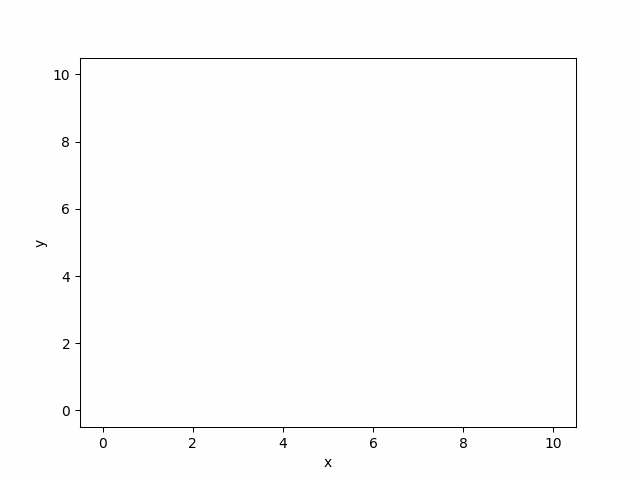

In [30]:
vis_graham_d.show_gif()

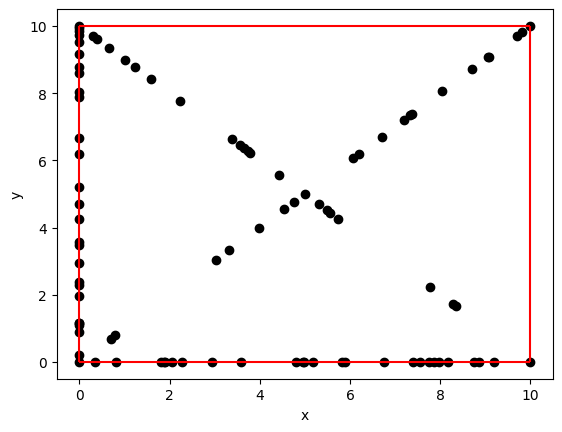

In [31]:
# visualize(graham_points_d)
vis.clear()
vis.add_point(points_d, color='black')
vis.add_line_segment([(graham_points_d[i], graham_points_d[i+1]) for i in range(len(graham_points_d)-1)], color='red')
vis.add_line_segment([graham_points_d[-1], graham_points_d[0]], color='red')
vis.show()

### Algorytm Jarvisa

Algorytm Jarvisa oblicza otoczkę wypukłą dla zbioru punktów $Q$ przez technikę zwaną owijaniem paczki (*package wrapping*) lub owijaniem prezentu (*gift wrapping*). Algorytm Jarvisa buduje sekwencję $H = \langle p_1, p_2, \dots, p_m \rangle$ będącą wierzchołkami $\mathcal{CH}(Q)$. Zaczynamy od punktu $p_0$, następny punkt $p_1$ w otoczce wypukłej ma najmniejszy kąt w odniesieniu do $p_0$ (w przypadku takiego samego kąta - wybiera się punkt najdalej od $p_0$). Podobnie, gdy $p_2$ ma najmniejszy kąt w odniesieniu do $p_1$, itd.. Zauważyć warto, że możemy tym sposobem obliczyć lewy i prawy łańcuch otoczki wypukłej $\mathcal{CH}(Q)$. Lewy łańcuch buduje się podobnie. Gdy osiągniemy najwyższy wierzchołej w prawym łańcuchu $p_k$, wybieramy wierzchołek $p_{k+1}$, który ma najmniejszy kąt w odniesieniu do $p_k$, ale od ujemnej osi-$x$. Można zaimplementować algorytm Jarvisa bez konstruowania pomocniczych łańcuchów - lewego i prawego. Taka implementacja utrzymuje śledzenie kąta ostatniej strony otoczki wypukłej i wymaga sekwencji kątów boków otoczki tylko rosnącej. (Patrząc na trzy ostatnie punkty jesteśmy w stanie obliczyć jaki punkt należy włączyć do $\mathcal{CH}(Q)$ w zależności od budowanego punktu)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa.

In [32]:
def jarvis_algorithm(Q, filename=None):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    min_point = min(Q, key = lambda x: (x[1], x[0]))
    hull = []
    p = min_point
    flag = True
    n = len(Q)
    
    while p != min_point or flag is True:
        flag = False
        point = Q[0]
        hull.append(p)
        for i in range(n):
            if orientation(p, point, Q[i]) == -1 or (orientation(p, Q[i], point) == 0 and distance(p, Q[i]) > distance(p, point)):
                point = Q[i]
        p = point
    if filename:
        with open(filename, 'w') as file:
            for i in range(len(hull)-1):
                line = ' '.join(str(x) for x in hull[i])
                file.write(line + '\n')
            line = ' '.join(str(x) for x in hull[-1])    
            file.write(line)
    return hull

Przetestuj swoją implementacje algorytmu Jarvisa, by sprawdzić czy poprawnie obliczana jest otoczka.

In [33]:
Test().runtest(2, jarvis_algorithm)

Lab 2, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 4.375s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa z dodatkową opcją wyświetlania kroków algorytmu.

In [34]:
def jarvis_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''
    vis = Visualizer()
    vis.clear()
    min_point = min(Q, key = lambda x: (x[1], x[0]))
    hull = []
    p = min_point
    flag = True
    n = len(Q)
    vis.add_point(Q, color='black')
    lines = []
    while p != min_point or flag is True:
        flag = False
        point = Q[0]
        hull.append(p)
        for i in range(n):
            if orientation(p, point, Q[i]) == -1 or (orientation(p, Q[i], point) == 0 and distance(p, Q[i]) > distance(p, point)):
                if lines: vis.remove_figure(lines.pop())
                lines.append(vis.add_line_segment((p, Q[i])))
                point = Q[i]
        vis.add_line_segment((p, point), color="red")
            
        p = point
    return hull, vis

Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [35]:
jarvis_points_a, vis_jarvis_a = jarvis_algorithm_draw(points_a)

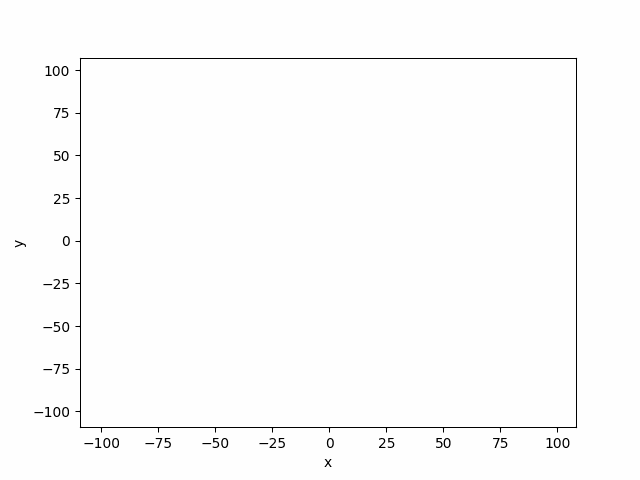

In [36]:
vis_jarvis_a.show_gif()

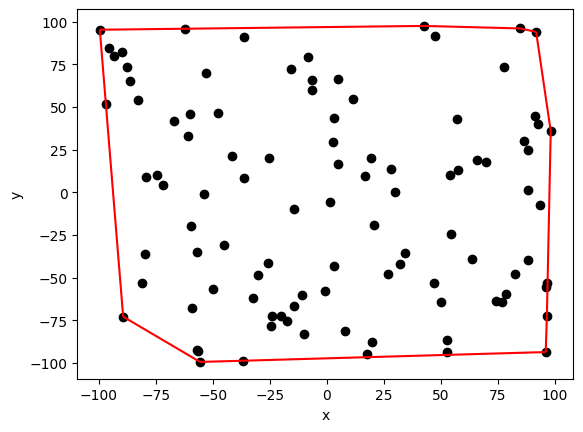

In [37]:
# visualize(jarvis_points_a)
vis.clear()
vis.add_point(points_a, color='black')
vis.add_line_segment([(jarvis_points_a[i], jarvis_points_a[i+1]) for i in range(len(jarvis_points_a)-1)], color='red')
vis.add_line_segment([jarvis_points_a[-1], jarvis_points_a[0]], color='red')
vis.show()

Zbiór danych B

In [38]:
jarvis_points_b, vis_jarvis_b = jarvis_algorithm_draw(points_b)

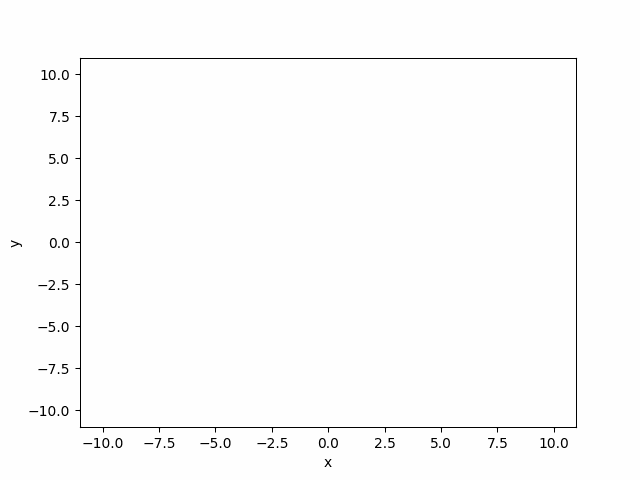

In [39]:
vis_jarvis_b.show_gif()

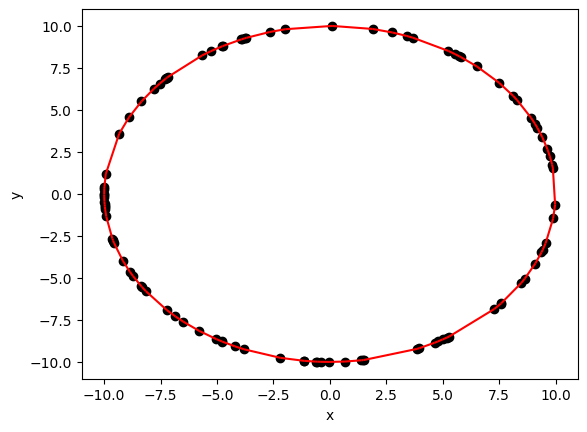

In [40]:
# visualize(jarvis_points_b)
vis.clear()
vis.add_point(points_b, color='black')
vis.add_line_segment([(jarvis_points_b[i], jarvis_points_b[i+1]) for i in range(len(jarvis_points_b)-1)], color='red')
vis.add_line_segment([jarvis_points_b[-1], jarvis_points_b[0]], color='red')
vis.show()

Zbiór danych C

In [41]:
jarvis_points_c, vis_jarvis_c = jarvis_algorithm_draw(points_c)

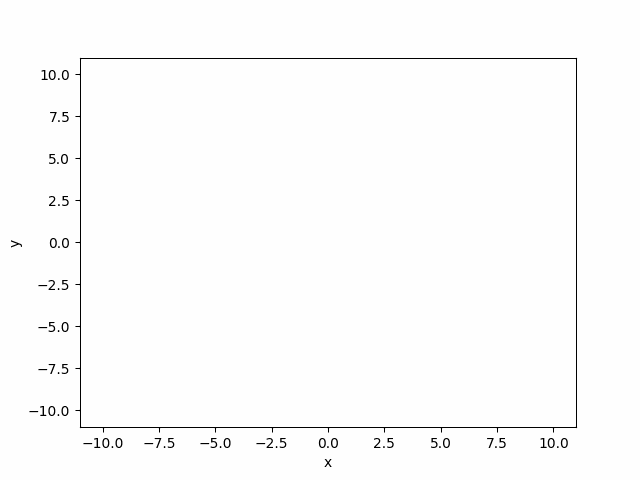

In [42]:
vis_jarvis_c.show_gif()

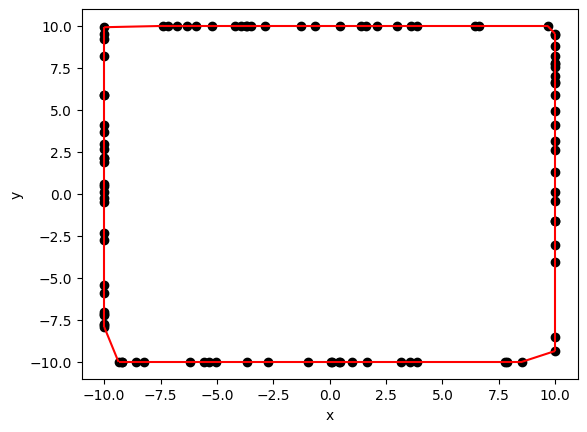

In [43]:
# visualize(jarvis_points_c)
vis.clear()
vis.add_point(points_c, color='black')
vis.add_line_segment([(jarvis_points_c[i], jarvis_points_c[i+1]) for i in range(len(jarvis_points_c)-1)], color='red')
vis.add_line_segment([jarvis_points_c[-1], jarvis_points_c[0]], color='red')
vis.show()

Zbiór danych D

In [44]:
jarvis_points_d, vis_jarvis_d = jarvis_algorithm_draw(points_d)

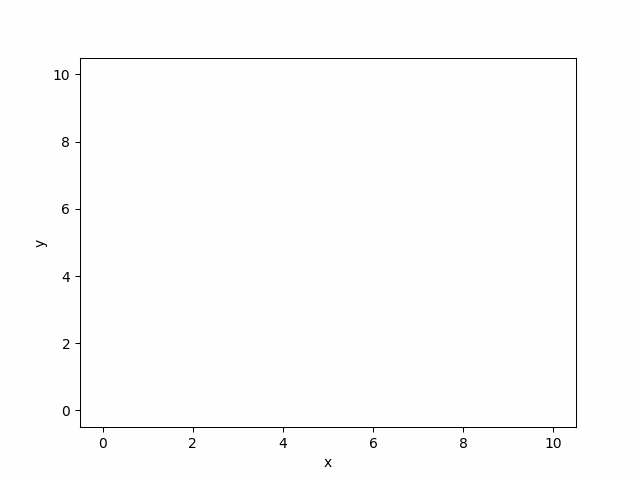

In [45]:
vis_jarvis_d.show_gif()

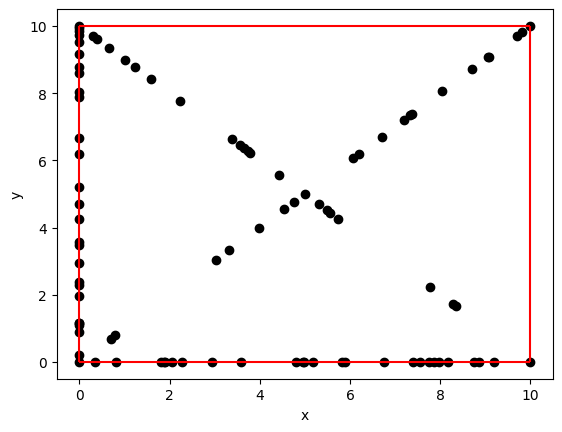

In [46]:
# visualize(jarvis_points_d)
vis.clear()
vis.add_point(points_d, color='black')
vis.add_line_segment([(jarvis_points_d[i], jarvis_points_d[i+1]) for i in range(len(jarvis_points_d)-1)], color='red')
vis.add_line_segment([jarvis_points_d[-1], jarvis_points_d[0]], color='red')
vis.show()

### Zapis do plików

In [47]:
%%capture
point_sets=[points_a, points_b, points_c, points_d]
titles = ['points_a', 'points_b', 'points_c', 'points_d']
algorithms = [graham_algorithm, jarvis_algorithm]
for algorithm in algorithms:
    for point_set, title in zip(point_sets, titles):
        algorithm(point_set, title+'_hull_'+f'{algorithm.__name__}')

### Czasy działania algorytmów

In [48]:
from time import time

def calc_time(points, func):
    start = time()
    func(points)
    stop=time()
    return stop-start

point_sets=[points_a, points_b, points_c, points_d]
titles = ['points_a', 'points_b', 'points_c', 'points_d']
algorithms = [graham_algorithm, jarvis_algorithm]

for point_set, title in zip(point_sets, titles):
    for algorithm in algorithms:
        t = calc_time(point_set, algorithm)
        print(f"Czas działania funkcji {algorithm.__name__} dla zbioru {title}: {t} s")

Czas działania funkcji graham_algorithm dla zbioru points_a: 0.002804279327392578 s
Czas działania funkcji jarvis_algorithm dla zbioru points_a: 0.0 s
Czas działania funkcji graham_algorithm dla zbioru points_b: 0.004306316375732422 s
Czas działania funkcji jarvis_algorithm dla zbioru points_b: 0.01215982437133789 s
Czas działania funkcji graham_algorithm dla zbioru points_c: 0.0019998550415039062 s
Czas działania funkcji jarvis_algorithm dla zbioru points_c: 0.0010013580322265625 s
Czas działania funkcji graham_algorithm dla zbioru points_d: 0.0036287307739257812 s
Czas działania funkcji jarvis_algorithm dla zbioru points_d: 0.0009963512420654297 s



---

Po zobaczeniu i przetestowaniu wstępnie zbiorów danych, przyszła kolej na porównanie czasów działania dla różnych danych. Do tego potrzebujemy bardziej miarodajnych zbiorów danych.  
<span style="color:red">Ćw.</span> Stwórz zmodyfikowane zbiory danych A, B, C oraz D - tak jak uważasz za słuszne.

Po przygotowaniu zbioru danych, dokonaj porównania czasowego  
<span style="color:red">Ćw.</span> Porównaj zmodyfikowane zbiory danych A, B, C oraz D dla algorytmów Grahama i Jarvisa.

### Zbiory typu A

Liczba punktów  Początek zakresu  Koniec zakresu  \
0             1000              -250             250   
1             2000              -250             250   
2             3000              -250             250   
3             4000              -250             250   
4             5000              -250             250   
5             6000              -250             250   
6             7000              -250             250   
7             8000              -250             250   
8             9000              -250             250   
9            10000              -250             250   
10           11000              -250             250   
11           12000              -250             250   

    Czas algorytmu Grahama [s]  Czas algorytmu Jarvisa [s]  Szybszy algorytm  \
0                     0.009562                    0.018916  Algorytm Grahama   
1                     0.020348                    0.033171  Algorytm Grahama   
2                     0.029431                    0.040361  Algorytm Grahama   
3                     0.043528                    0.062497  Algorytm Grahama   
4                     0.054104                    0.110569  Algorytm Grahama   
5                     0.065891                    0.120061  Algorytm Grahama   
6                     0.083786                    0.134477  Algorytm Grahama   
7                     0.099006                    0.158655  Algorytm Grahama   
8                     0.109109                    0.145952  Algorytm Grahama   
9                     0.110049                    0.222275  Algorytm Grahama   
10                    0.142200                    0.205637  Algorytm Grahama   
11                    0.150641                    0.307900  Algorytm Grahama   

    Róznica czasu [s]  
0            0.009355  
1            0.012823  
2            0.010930  
3            0.018970  
4            0.056465  
5            0.054169  
6            0.050691  
7            0.059649  
8            0.036843  
9            0.112225  
10           0.063436  
11           0.157259

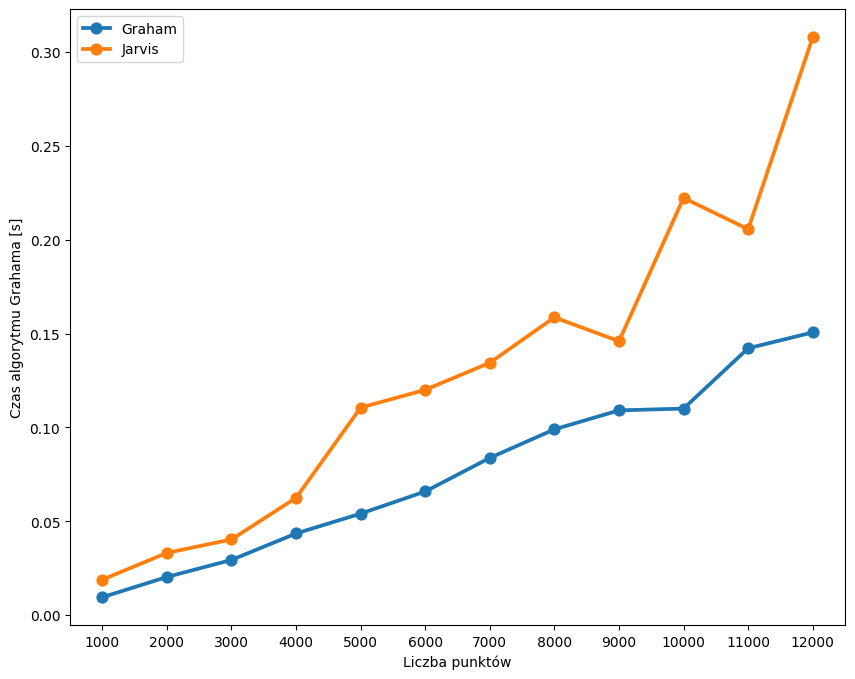

In [49]:
def time_comparison_pointset_A():
    columns =["Liczba punktów","Początek zakresu","Koniec zakresu","Czas algorytmu Grahama [s]","Czas algorytmu Jarvisa [s]",
             "Szybszy algorytm","Róznica czasu [s]"]
    num_of_points = [1000*i for i in range(1,13)]
    data = []
    for i in range(len(num_of_points)):
        points_range = [-250,250]
        points=generate_uniform_points(points_range[0], points_range[1], num_of_points[i])
        graham_time = calc_time(points, graham_algorithm)
        jarvis_time = calc_time(points, jarvis_algorithm)
        if(graham_time < jarvis_time):
            faster_algorithm = "Algorytm Grahama"
        else:
            faster_algorithm = "Algorytm Jarvisa"
        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points[i],points_range[0],points_range[1],graham_time,jarvis_time,faster_algorithm,time_comparison))
    return pd.DataFrame(data=data, columns = columns)

A = time_comparison_pointset_A()
display(A)

x = "Liczba punktów"
y_1 = "Czas algorytmu Grahama [s]"
y_2 = "Czas algorytmu Jarvisa [s]"
plt.figure(figsize=(10, 8))
sns.pointplot(data=A,x=x,y=y_1, label='Graham')
sns.pointplot(data=A,x=x,y=y_2, label='Jarvis')
plt.legend(loc="best")

### Zbiory typu B

Liczba punktów Środek okręgu  Promień  Czas algorytmu Grahama [s]  \
0             100       (9, -9)       12                    0.000995   
1             200     (-5, -19)       19                    0.002000   
2             300      (22, -1)       16                    0.006088   
3             400    (-26, -29)       31                    0.005984   
4             500       (28, 5)       13                    0.004981   
5             600     (54, -15)       56                    0.005943   
6             700     (70, -43)       15                    0.012641   
7             800    (-35, -12)      155                    0.007512   
8             900     (-73, 17)      105                    0.015625   
9            1000    (-65, -38)      104                    0.015690   

   Czas algorytmu Jarvisa [s]  Szybszy algorytm  Róznica czasu [s]  
0                    0.012507  Algorytm Grahama           0.011513  
1                    0.044467  Algorytm Grahama           0.042467  
2                    0.109219  Algorytm Grahama           0.103132  
3                    0.193497  Algorytm Grahama           0.187513  
4                    0.279367  Algorytm Grahama           0.274386  
5                    0.419329  Algorytm Grahama           0.413386  
6                    0.580909  Algorytm Grahama           0.568268  
7                    0.758419  Algorytm Grahama           0.750907  
8                    0.947443  Algorytm Grahama           0.931818  
9                    1.191180  Algorytm Grahama           1.175490

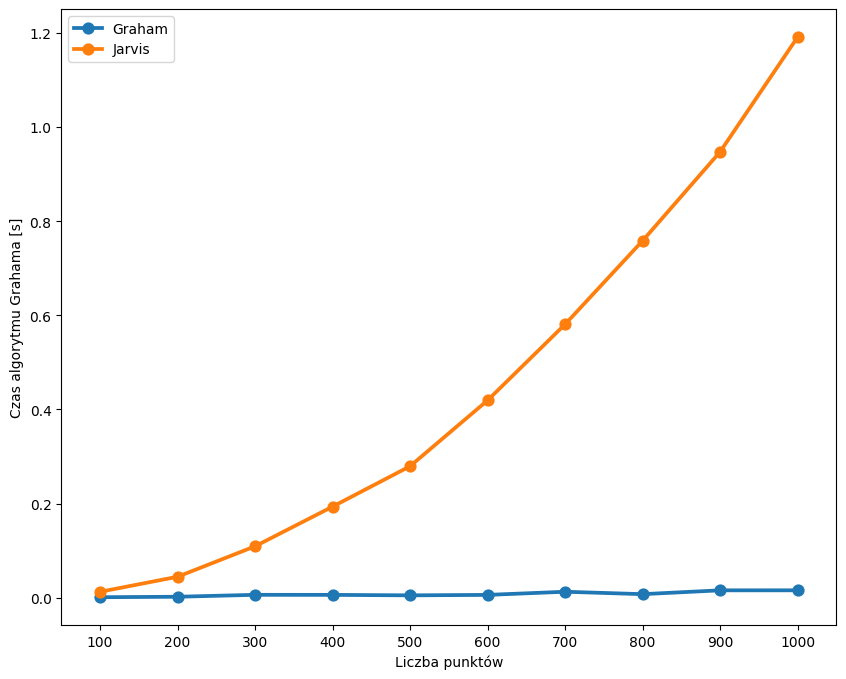

In [50]:
def time_comparison_pointset_B():
    data=[]
    columns =["Liczba punktów","Środek okręgu","Promień","Czas algorytmu Grahama [s]","Czas algorytmu Jarvisa [s]",
         "Szybszy algorytm","Róznica czasu [s]"]
    
    for i in range(1,11):
        middle = [random.randint(-10*i,10*i), random.randint(-10*i,10*i)]
        middle = (middle[0], middle[1])
        radius = random.randint(1*i,20*i)
        num_of_points = i*100
        points=generate_circle_points(middle, radius, num_of_points)
        graham_time = calc_time(points, graham_algorithm)
        jarvis_time = calc_time(points, jarvis_algorithm)
        if(graham_time < jarvis_time):
            faster_algorithm = "Algorytm Grahama"
        else:
            faster_algorithm = "Algorytm Jarvisa"
        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points,middle,radius,graham_time,jarvis_time,faster_algorithm,time_comparison))
    
    return pd.DataFrame(data=data, columns=columns)

B = time_comparison_pointset_B()
display(B)

x = "Liczba punktów"
y_1 = "Czas algorytmu Grahama [s]"
y_2 = "Czas algorytmu Jarvisa [s]"
plt.figure(figsize=(10, 8))
sns.pointplot(data=B,x=x,y=y_1, label='Graham')
sns.pointplot(data=B,x=x,y=y_2, label='Jarvis')
plt.legend(loc="best")

### Zbiory typu C

Liczba punktów Dwa przeciwległe wierzchołki prostokąta  \
0             1000                    (-56, 2) i (-48, 53)   
1             2000                    (-13, 2) i (-11, 29)   
2             3000                    (-42, 29) i (55, 47)   
3             4000                    (-40, 22) i (67, 58)   
4             5000                  (-58, -51) i (60, -41)   
5             6000                   (23, -59) i (30, -45)   
6             7000                    (11, -42) i (37, 13)   
7             8000                    (-19, 30) i (17, 59)   
8             9000                   (17, -34) i (31, -17)   
9            10000                     (5, -58) i (10, 14)   
10           11000                      (0, 44) i (36, 62)   
11           12000                   (-44, -35) i (65, 16)   

    Czas algorytmu Grahama [s]  Czas algorytmu Jarvisa [s]  Szybszy algorytm  \
0                     0.014210                    0.005073  Algorytm Jarvisa   
1                     0.036611                    0.008627  Algorytm Jarvisa   
2                     0.054829                    0.019918  Algorytm Jarvisa   
3                     0.076729                    0.028915  Algorytm Jarvisa   
4                     0.105712                    0.033412  Algorytm Jarvisa   
5                     0.149750                    0.056716  Algorytm Jarvisa   
6                     0.177126                    0.063896  Algorytm Jarvisa   
7                     0.232481                    0.082082  Algorytm Jarvisa   
8                     0.259520                    0.088874  Algorytm Jarvisa   
9                     0.315222                    0.079784  Algorytm Jarvisa   
10                    0.355481                    0.066711  Algorytm Jarvisa   
11                    0.405203                    0.062760  Algorytm Jarvisa   

    Róznica czasu [s]  
0            0.009137  
1            0.027985  
2            0.034911  
3            0.047814  
4            0.072300  
5            0.093035  
6            0.113230  
7            0.150399  
8            0.170646  
9            0.235437  
10           0.288770  
11           0.342443

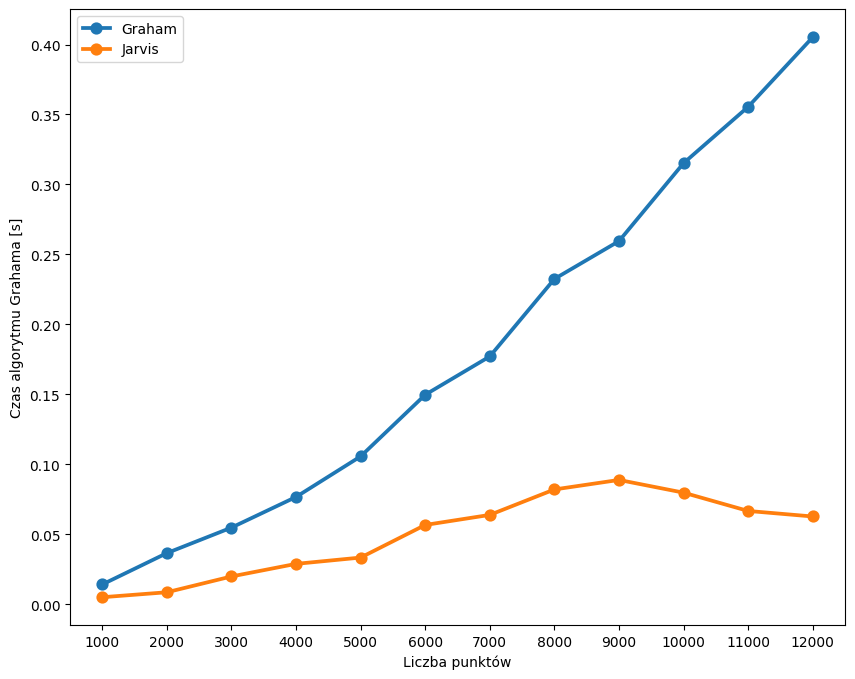

In [51]:
def time_comparison_pointset_C():
    data = []
    columns =["Liczba punktów","Dwa przeciwległe wierzchołki prostokąta","Czas algorytmu Grahama [s]","Czas algorytmu Jarvisa [s]",
     "Szybszy algorytm","Róznica czasu [s]"]
    num_of_points = [1000*i for i in range(1,13)]
    data = []
    for i in range(len(num_of_points)):
        x1=random.randint(-60,70)
        x2=random.randint(-60,70)
        y1=random.randint(-60,70)
        y2=random.randint(-60,70)
        if(x1>x2): x1,x2=x2,x1
        if(y1>y2): y1,y2=y2,y1
        vertex = [(x1,y1),(x2,y1),(x2,y2),(x1,y2)]
        points = generate_rectangle_points(vertex[0], vertex[1], vertex[2], vertex[3], num_of_points[i])
        graham_time = calc_time(points, graham_algorithm)
        jarvis_time = calc_time(points, jarvis_algorithm)
        if(graham_time < jarvis_time):
            faster_algorithm = "Algorytm Grahama"
        else:
            faster_algorithm = "Algorytm Jarvisa"
        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points[i],str(vertex[0])+' i '+str(vertex[2]),graham_time,jarvis_time,faster_algorithm,time_comparison))
    return pd.DataFrame(data=data, columns=columns)

C = time_comparison_pointset_C()
display(C)

x = "Liczba punktów"
y_1 = "Czas algorytmu Grahama [s]"
y_2 = "Czas algorytmu Jarvisa [s]"
plt.figure(figsize=(10, 8))
sns.pointplot(data=C,x=x,y=y_1, label='Graham')
sns.pointplot(data=C,x=x,y=y_2, label='Jarvis')
plt.legend(loc="best")

### Zbiory typu  D

Liczba punktów na boku  Liczba punktów na przekątnej  \
0                      100                            50   
1                      200                           100   
2                      300                           150   
3                      400                           200   
4                      500                           250   
5                      600                           300   
6                      700                           350   
7                      800                           400   
8                      900                           450   
9                     1000                           500   
10                    1100                           550   
11                    1200                           600   

   Dwa przeciwległe wierzchołki kwadratu  Czas algorytmu Grahama [s]  \
0                    (28, -29) i (57, 0)                    0.039030   
1                    (-37, 15) i (5, 57)                    0.141014   
2                  (-49, -17) i (37, 69)                    0.344214   
3                   (12, -17) i (28, -1)                    0.601213   
4                   (32, -1) i (108, 75)                    0.891496   
5                  (-15, -18) i (73, 70)                    1.287122   
6                    (12, -3) i (47, 32)                    1.913570   
7                   (-1, -21) i (86, 66)                    2.335879   
8                  (-35, -41) i (52, 46)                    2.924479   
9                    (10, 25) i (55, 70)                    3.719440   
10                    (25, 4) i (41, 20)                    4.295208   
11                   (39, 36) i (60, 57)                    5.184240   

    Czas algorytmu Jarvisa [s]  Szybszy algorytm  Róznica czasu [s]  
0                     0.000000  Algorytm Jarvisa           0.039030  
1                     0.000000  Algorytm Jarvisa           0.141014  
2                     0.012004  Algorytm Jarvisa           0.332210  
3                     0.009520  Algorytm Jarvisa           0.591693  
4                     0.014505  Algorytm Jarvisa           0.876990  
5                     0.007074  Algorytm Jarvisa           1.280047  
6                     0.019640  Algorytm Jarvisa           1.893930  
7                     0.026200  Algorytm Jarvisa           2.309679  
8                     0.017846  Algorytm Jarvisa           2.906633  
9                     0.015605  Algorytm Jarvisa           3.703835  
10                    0.027505  Algorytm Jarvisa           4.267703  
11                    0.027686  Algorytm Jarvisa           5.156554

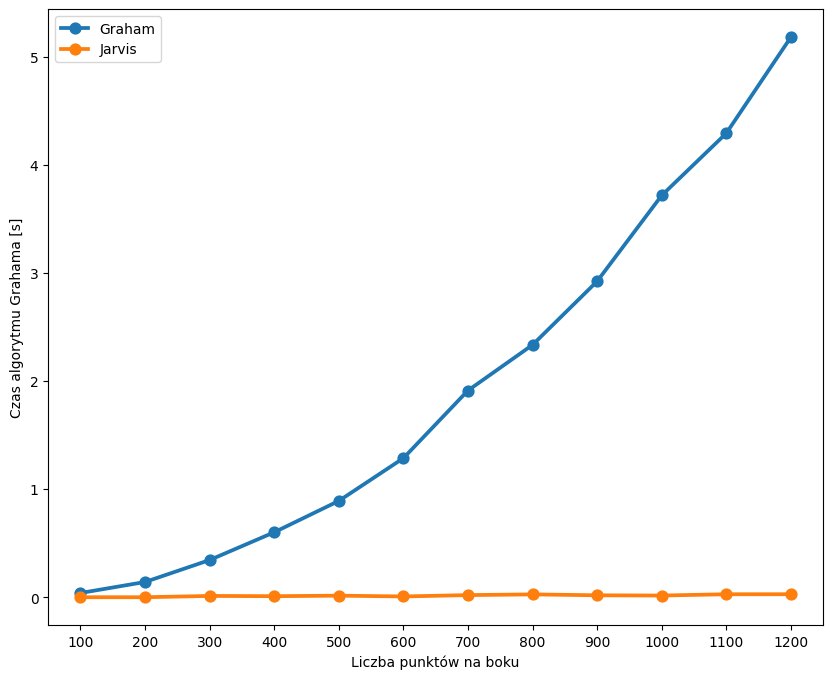

In [52]:
def time_comparison_pointset_D():
    axis_points = [100*i for i in range(1,13)]
    data = []
    columns =["Liczba punktów na boku","Liczba punktów na przekątnej","Dwa przeciwległe wierzchołki kwadratu","Czas algorytmu Grahama [s]","Czas algorytmu Jarvisa [s]",
             "Szybszy algorytm","Róznica czasu [s]"]
    for i in range(len(axis_points)):
        x=random.randint(-50,40)
        y=random.randint(-50,40)
        side=random.randint(10,90)
        vertex = [(x,y),(x,y+side),(x+side,y+side),(x+side,y)]
        points=generate_square_points(vertex[0], vertex[1], vertex[2], vertex[3], axis_points[i], axis_points[i]//2)
        graham_time = calc_time(points, graham_algorithm)
        jarvis_time = calc_time(points, jarvis_algorithm)
        if(graham_time < jarvis_time):
            faster_algorithm = "Algorytm Grahama"
        else:
            faster_algorithm = "Algorytm Jarvisa"
        time_comparison = abs(graham_time - jarvis_time)
        data.append((axis_points[i],axis_points[i]//2,str(vertex[0])+' i '+str(vertex[2]), graham_time,jarvis_time,faster_algorithm,time_comparison))
    return pd.DataFrame(data=data, columns=columns)

D = time_comparison_pointset_D()
display(D)

x = "Liczba punktów na boku"
y_1 = "Czas algorytmu Grahama [s]"
y_2 = "Czas algorytmu Jarvisa [s]"
plt.figure(figsize=(10, 8))
sns.pointplot(data=D,x=x,y=y_1, label='Graham')
sns.pointplot(data=D,x=x,y=y_2, label='Jarvis')
plt.legend(loc="best")

WNIOSKI HERE  
W sprawozdaniu napisz, czy Twój program działał poprawnie dla wszystkich zbiorów
danych oraz opisz krótko wnioski dotyczące działania algorytmu dla poszczególnych
zbiorów. Napisz, dlaczego wg Ciebie zaproponowano takie zbiory punktów? Które ze
zbiorów mogły stwarzać problemy w działaniu algorytmów? Jeśli tak, to jakie i
dlaczego? Porównaj czasy działania obu algorytmów w zależności od liczby punktów
w poszczególnych zbiorach (A, B, C, D). Dołącz wybrane, istotne ilustracje.

Bibliografia:
- Wprowadzenie do algorytmów wydanie 3, Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, Stein Clifford
